# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [39]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [40]:
# 1. Criar uma coluna indicando a faixa de latitude do município
sinasc_raw['FaixaLat'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

# 2. Usar groupby com a coluna de faixa de latitude
grouped = sinasc_raw.groupby('FaixaLat')

# 3. Aplicar operações de agregação para as variáveis numéricas selecionadas
aggregated_results = grouped.agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Visualizando os resultados
print(aggregated_results)


                IDADEMAE                                                 \
                     sum       mean min max median       std        var   
FaixaLat                                                                  
Abaixo de -10.5   340143  26.178943  12  53   26.0  6.320385  39.947272   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                QTDFILVIVO                                                  
                       sum      mean  min   max median       std       var  
FaixaLat                                                                    
Abaixo de -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727  
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674  



### Insight 01:

### Idade média das mães:

A média de idade das mães é semelhante nas duas

*   faixas de latitude, com valores em torno de 26 anos.
*   A distribuição das idades parece ser relativamente próxima, com medianas próximas a 25-26 anos.
*   A faixa de idade das mães varia de 11 a 53 anos, indicando uma ampla distribuição de idades.

### Número médio de filhos vivos:

*   A média do número de filhos vivos parece ser ligeiramente maior na faixa de latitude acima de -10.5, com cerca de 1.13 filhos, em comparação com cerca de 0.98 na faixa abaixo de -10.5.
*   Ambas as faixas têm uma mediana de 1 filho vivo.
A variabilidade no número de filhos vivos parece ser maior na faixa de latitude acima de -10.5, com um desvio padrão ligeiramente maior e uma variância mais alta.


### Os valores obtidos indicam as características demográficas em relação as mães nos municípios de Rondônia, diferenciadas por faixas de latitude. Essas informações podem ser úteis para planejar e desenvolver políticas públicas voltadas para a saúde materna e infantil, bem como para entender melhor as características demográficas das diferentes regiões.

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [41]:
# 1. Criar uma coluna indicando a faixa de área dos municípios
sinasc_raw['FaixaArea'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

# 2. Usar groupby com a coluna de faixa de área
grouped_area = sinasc_raw.groupby('FaixaArea')

# 3. Aplicar operações de agregação para as variáveis numéricas selecionadas
aggregated_results_area = grouped_area.agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Visualizando os resultados
print(aggregated_results_area)


               IDADEMAE                                                 \
                    sum       mean min max median       std        var   
FaixaArea                                                                
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
FaixaArea                                                                  
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
Acima de 3000      5383.0  0.272116  0.0  28.0    0.0  0.629081  0.395743  


Insights 02:

### Idade média das mães:

1.   A média de idade das mães é semelhante em ambas as faixas de área, com valores em torno de 26 anos.

2.   A distribuição das idades parece ser relativamente próxima, com medianas próximas a 25-26 anos.

3.   A faixa de idade das mães varia de 11 a 53 anos, indicando uma ampla distribuição de idades.

### Número médio de filhos mortos:

1.   A média do número de filhos mortos parece ser ligeiramente maior na faixa de área acima de 3000, com cerca de 0.27 filhos, em comparação com cerca de 0.24 na faixa abaixo de 3000.

2.   Ambas as faixas têm uma mediana de 0 filho morto.

3.   A variabilidade no número de filhos mortos parece ser um pouco maior na faixa de área acima de 3000, com um desvio padrão e uma variância ligeiramente maiores.

### Temos uma visão das características demográficas das mães nos municípios de Rondônia, diferenciadas por faixas de área. Essas informações podem ser úteis para entender melhor as características demográficas das diferentes regiões e para orientar políticas públicas relacionadas à saúde materna e infantil, especialmente em relação ao número de filhos mortos.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [42]:
# 1. Determinar faixas na variável munResAlt
alt_bins = pd.cut(sinasc_raw['munResAlt'], bins=5)  # Dividindo em 5 faixas, você pode ajustar o número de faixas conforme necessário

# Adicionar as faixas ao DataFrame
sinasc_raw['AltitudeFaixa'] = alt_bins

# 2. Usar groupby com a coluna de faixa de altitude
grouped_altitude = sinasc_raw.groupby('AltitudeFaixa')

# 3. Aplicar operações de agregação para as variáveis numéricas selecionadas
aggregated_results_altitude = grouped_altitude.agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Visualizando os resultados
print(aggregated_results_altitude)


               IDADEMAE                                                 \
                    sum       mean min max median       std        var   
AltitudeFaixa                                                            
(84.49, 187.0]   524269  26.027354  11  52   25.0  6.426582  41.300960   
(187.0, 289.0]   114398  26.280266  13  53   26.0  6.213165  38.603418   
(289.0, 391.0]    14807  25.841187  13  53   25.0  6.402653  40.993965   
(391.0, 493.0]     9733  26.448370  14  47   26.0  6.484738  42.051823   
(493.0, 595.0]    42030  26.433962  14  46   26.0  6.310937  39.827921   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
AltitudeFaixa                                                              
(84.49, 187.0]     5008.0  0.275649  0.0   9.0    0.0  0.607269  0.368776  
(187.0, 289.0]     1047.0  0.246295  0.0   4.0    0.0  0.544303  0.296266  
(289.0, 391.0]      108.0  

### Insight 03:

### Idade média das mães:


1.   A média de idade das mães é relativamente consistente em todas as faixas de altitude, variando de aproximadamente 25.8 a 26.4 anos.

2.   A distribuição das idades parece ser similar entre as faixas, com medianas em torno de 25-26 anos.

3.   A faixa de idade das mães varia de 11 a 53 anos em todas as faixas de altitude.


### Número médio de filhos mortos:


1.   O número médio de filhos mortos parece variar ligeiramente entre as faixas de altitude.

2.   As faixas de altitude mais baixas (84.49 a 187.0) e mais altas (493.0 a 595.0) têm uma média de filhos mortos ligeiramente mais alta, em torno de 0.25 a 0.28, respectivamente.

3.   As faixas de altitude intermediárias têm uma média de filhos mortos um pouco menor, variando de aproximadamente 0.19 a 0.25.










### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

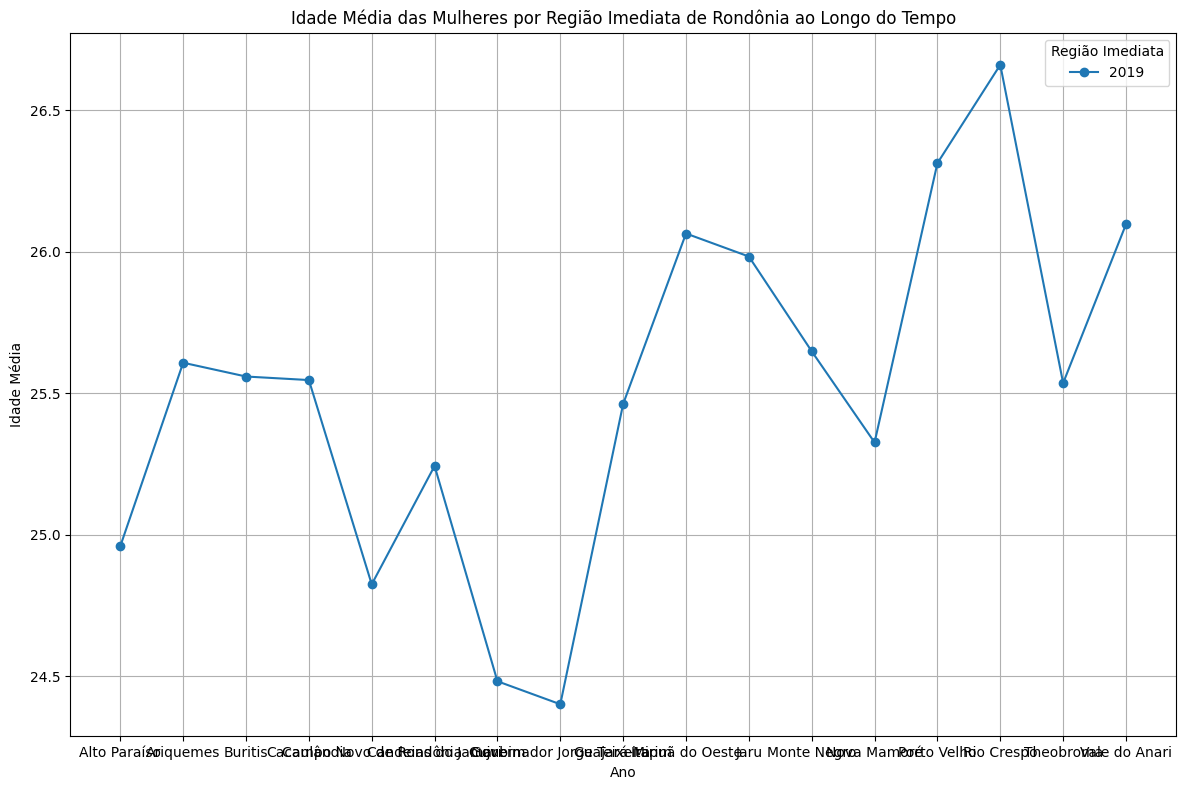

In [43]:
# Mapeamento das regiões imediatas para os respectivos municípios
regioes_imediatas = {
    'Porto Velho': ['Candeias do Jamari', 'Guajará-Mirim', 'Itapuã do Oeste', 'Nova Mamoré', 'Porto Velho'],
    'Ariquemes': ['Alto Paraíso', 'Ariquemes', 'Buritis', 'Cacaulândia', 'Campo Novo de Rondônia', 'Cujubim', 'Monte Negro', 'Rio Crespo'],
    'Jaru': ['Governador Jorge Teixeira', 'Jaru', 'Machadinho d\'Oeste', 'Theobroma', 'Vale do Anari']
}

# Filtrar os dados para incluir apenas os municípios das regiões imediatas especificadas
sinasc_regioes = sinasc_raw[sinasc_raw['munResNome'].isin(sum(regioes_imediatas.values(), []))].copy()

# Extrair o ano dos dados
sinasc_regioes['ANO'] = pd.to_datetime(sinasc_regioes['DTNASC']).dt.year

# Agrupar os dados por região imediata e ano, calculando a idade média das mulheres
idade_media_por_regiao = sinasc_regioes.groupby(['munResNome', 'ANO'])['IDADEMAE'].mean().unstack()

# Plotar o gráfico
idade_media_por_regiao.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Idade Média')
plt.grid(True)
plt.legend(title='Região Imediata')

# Definir os rótulos do eixo x manualmente
plt.xticks(range(len(idade_media_por_regiao.index)), idade_media_por_regiao.index)

plt.tight_layout()
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [48]:
# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

# Fazendo uma solicitação GET para obter o conteúdo da página
response = requests.get(url)

# Criando um objeto BeautifulSoup para analisar o conteúdo HTML
soup = BeautifulSoup(response.content, "html.parser")

# Encontrando a tabela na página com base na classe wikitable
table = soup.find("table", {"class": "wikitable"})

# Lendo a tabela em um DataFrame do Pandas
# Especificando que o cabeçalho está na terceira linha (índice 2)
df = pd.read_html(str(table), header=2)[0]

# Limpando e preparando os dados
# Remover linhas com valores NaN
df = df.dropna()

# Remover linhas de cabeçalho
df = df[df["IDH-M muito alto"] != "nenhum município"]

# Renomear as colunas para facilitar o acesso
df.columns = ["Posição", "munResNome", "IDH_municipal", "IDH_renda", "IDH_longevidade", "IDH_educação"]

# Exibir o DataFrame
print(df.head())


      Posição   munResNome IDH_municipal   IDH_renda IDH_longevidade  \
1  IDH-M alto   IDH-M alto    IDH-M alto  IDH-M alto      IDH-M alto   
2           1  Porto Velho         0.736       0.764           0.819   
3           2      Vilhena         0.731       0.734           0.808   
4           3       Cacoal         0.718       0.727           0.821   
5           4    Ji-Paraná         0.714       0.728           0.810   

  IDH_educação  
1   IDH-M alto  
2        0.638  
3        0.659  
4        0.620  
5        0.617  


### Insight 04:
Os dados fornecem informações sobre o Índice de Desenvolvimento Humano Municipal (IDH-M) de alguns municípios de Rondônia. O IDH-M é uma medida composta que considera o desenvolvimento em quatro dimensões principais: renda, longevidade, educação e municipal.

* IDH Municipal: Refere-se à medida geral do índice de desenvolvimento humano para o município.

* IDH Renda: Refere-se à dimensão do IDH-M relacionada à renda média dos habitantes do município.

* IDH Longevidade: Refere-se à dimensão do IDH-M relacionada à expectativa de vida ao nascer dos habitantes do município.

* IDH Educação: Refere-se à dimensão do IDH-M relacionada ao acesso à educação e à média de anos de estudo da população.

Os municípios listados foram classificados como "IDH-M alto", o que indica que possuem um bom desenvolvimento humano em comparação com outros municípios do estado. As medidas específicas de cada dimensão do IDH-M são fornecidas para cada município listado.


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [53]:
# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"

# Fazendo uma solicitação GET para obter o conteúdo da página
response = requests.get(url)

# Criando um objeto BeautifulSoup para analisar o conteúdo HTML
soup = BeautifulSoup(response.content, "html.parser")

# Encontrando a tabela na página com base na classe wikitable
table = soup.find("table", {"class": "wikitable"})

# Lendo a tabela em um DataFrame do Pandas
df = pd.read_html(str(table), header=[0, 1])[0]

# Limpando e preparando os dados
# Remover linhas com valores NaN
df = df.dropna()

# Remover linhas de cabeçalho
df = df[df["Posição"]["Desenvolvimento alto"] != "nenhum município"]

# Renomear as colunas para facilitar o acesso
df.columns = ["Posição", "Município", "IFDM"]

# Exibir o DataFrame
print(df.head())


                    Posição                 Município  \
1  Desenvolvimento moderado  Desenvolvimento moderado   
2                        1º                 Ariquemes   
3                        2º                   Vilhena   
4                        3º             Pimenta Bueno   
5                        4º               Porto Velho   

                       IFDM  
1  Desenvolvimento moderado  
2                    0.7746  
3                    0.7465  
4                    0.7383  
5                    0.7257  


### Insight 05:
Os dados fornecem informações sobre o Índice Firjan de Desenvolvimento Municipal (IFDM) de alguns municípios de Rondônia. O IFDM é uma medida composta que avalia o desenvolvimento socioeconômico dos municípios brasileiros.

* Desenvolvimento Moderado: Refere-se a uma classificação geral do IFDM para os municípios listados, indicando que possuem um nível intermediário de desenvolvimento socioeconômico.
* IFDM: É a medida específica do Índice Firjan de Desenvolvimento Municipal para cada município listado. Este índice é calculado com base em três áreas: Emprego e Renda, Educação e Saúde.


Os municípios listados foram classificados como tendo um desenvolvimento socioeconômico moderado. As medidas específicas do IFDM são fornecidas para cada município, o que permite uma comparação relativa do seu desempenho nessas áreas em comparação com outros municípios.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [56]:
# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

# Fazendo uma solicitação GET para obter o conteúdo da página
response = requests.get(url)

# Criando um objeto BeautifulSoup para analisar o conteúdo HTML
soup = BeautifulSoup(response.content, "html.parser")

# Encontrando a tabela na página com base na classe wikitable
table = soup.find("table", {"class": "wikitable"})

# Lendo a tabela em um DataFrame do Pandas
df = pd.read_html(str(table), header=0)[0]

# Exibindo as primeiras linhas do DataFrame para entender a estrutura dos dados
print(df.head())


   Posição       Posição.1    Município         PIB  Alteração
0  Em 2019  Mudança (2014)    Município         PIB  Alteração
1        1             (0)  Porto Velho  17 912 070        NaN
2        2             (0)    Ji-Paraná   3 783 972        NaN
3        3             (0)      Vilhena   2 831 175        NaN
4        4             (0)    Ariquemes   2 579 830        NaN


### Insight 06:

Os dados fornecem informações sobre o Produto Interno Bruto (PIB) de alguns municípios de Rondônia em 2019, juntamente com a mudança no PIB desde 2014. Aqui está uma descrição das colunas:

* Posição: Classificação do município com base no seu PIB em 2019.

* Posição.1: Indicação da mudança na posição do município em relação ao seu PIB desde 2014.

* Município: Nome do município.

* PIB: O Produto Interno Bruto do município em 2019, representado em milhões de reais.

* Alteração: Indicação de mudança, possivelmente ausente devido a um valor NaN na amostra fornecida.


Esses dados são úteis para entender a distribuição econômica entre os municípios de Rondônia, destacando aqueles com os maiores PIBs em 2019 e a mudança relativa desde 2014. Isso pode ser usado para identificar áreas de crescimento econômico e para orientar políticas e investimentos econômicos futuros.